In [172]:
# ################################################# DATA VISUALIZATION ################################################# 
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from wordcloud import WordCloud
import os
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jerhadf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jerhadf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Setup

In [47]:
# ################################################# AI RESPONSES #################################################

# make dictionary for matching stakeholders to stakeholder_types
stakeholder_mapping = {
    "Academic_Researchers_on_Great_Salt_Lake": "academics",
    "Agricultural_Sector_in_Utah": "agriculture",
    "Air_Quality_Management_Agencies_in_Utah": "government",
    "Brine_Shrimp_Harvesters": "industry",
    "Environmental_Activists_in_Utah": "environmentalists",
    "Federal_Environmental_Agencies_(e.g.,_EPA)": "government",
    "Fishing_Industry_in_Utah": "industry",
    "Friends_of_Great_Salt_Lake": "environmentalists",
    "Great_Salt_Lake_Advisory_Council": "government",
    "Great_Salt_Lake_Audubon": "environmentalists",
    "Great_Salt_Lake_Institute": "academics",
    "Local_Businesses_in_Salt_Lake_City": "industry",
    "Local_Media_Outlets_in_Salt_Lake_City": "media",
    "Mineral_Extraction_Industry": "industry",
    "Native_American_Tribes_with_Ties_to_Great_Salt_Lake": "native_american_tribes",
    "Outdoor_Recreation_Enthusiasts_in_Utah": "recreation",
    "Public_Health_Officials_in_Utah": "health",
    "Real_Estate_Developers_in_Salt_Lake_City": "industry",
    "Salt_Lake_City_Residents": "residents",
    "Tourism_Industry_in_Utah": "industry",
    "Utah_Department_of_Environmental_Quality": "government",
    "Utah_Department_of_Natural_Resources": "government",
    "Utah_Department_of_Transportation": "government",
    "Utah_Division_of_Water_Resources": "government",
    "Utah_Geological_Survey": "government",
    "Utah_Religious_Communities": "religious_communities",
    "Utah_State_Legislators": "government",
    "Wildlife_Conservation_Organizations_in_Utah": "environmentalists",
    "Young_people_and_youth_groups_in_Utah": "youth"
}

# Define the directory
directory = 'responses/AI/'

# Initialize an empty DataFrame
df = pd.DataFrame()

# Initialize an empty DataFrame with the desired columns
df = pd.DataFrame(columns=["source", "filepath", "content", "stakeholder_type", "values", 
                           "keywords", "methods", "solutions", "facts"])

,source,filepath,content,stakeholder_type,values,keywords,methods,solutions,facts
0,AI,"responses/AI/""Utah_State_Legislators""_response...",{'“How does the Great Salt Lake drying up affe...,government,NaN,NaN,NaN,NaN,NaN
1,AI,"responses/AI/""Local_Media_Outlets_in_Salt_Lake...",{'“How does the Great Salt Lake drying up affe...,media,NaN,NaN,NaN,NaN,NaN
2,AI,"responses/AI/""Great_Salt_Lake_Audubon""_respons...",{'“How does the Great Salt Lake drying up affe...,environmentalists,NaN,NaN,NaN,NaN,NaN
3,AI,"responses/AI/""Outdoor_Recreation_Enthusiasts_i...",{'“How does the Great Salt Lake drying up affe...,recreation,NaN,NaN,NaN,NaN,NaN
4,AI,"responses/AI/""Tourism_Industry_in_Utah""_respon...",{'“How does the Great Salt Lake drying up affe...,industry,NaN,NaN,NaN,NaN,NaN


In [48]:
df.content[0]

{'“How does the Great Salt Lake drying up affect your personal and professional life? Provide specific stories or facts from your life.”': 'The Great Salt Lake drying up has been a major concern for me personally and professionally. As a representative of the Utah State Legislature, I am keenly aware of the impact that this crisis has on the people of my state. \n\nPersonally, I have seen how the receding lake levels have taken a toll on the local wildlife. I grew up in the area, and I remember the Great Salt Lake being a vibrant and thriving ecosystem. Now, I see the lake slowly drying up, and I know that this will have a devastating impact on the birds and other animals that rely on the lake for their habitat. \n\nProfessionally, I understand that this crisis has the potential to have a major economic impact on our state. The Great Salt Lake is an integral part of our tourism industry, and the receding lake levels could have a serious effect on our ability to attract visitors. Additi

In [ ]:
# Directory containing the AI-generated responses
directory = "responses/AI/"

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        # Construct the full file path
        filepath = os.path.join(directory, filename)
        
        # Read the content of the file
        with open(filepath, 'r') as file:
            content = file.read()
        
        # Split the content into question-answer pairs
        qa_pairs = content.split("# ")[1:]  # Skip the first split result, as it will be empty due to the leading "# "
        qa_dict = {}
        for qa_pair in qa_pairs:
            question, answer = qa_pair.split("\n", 1)  # Split on the first newline to separate the question from the answer
            qa_dict[question] = answer.strip()  # Remove leading/trailing whitespace from the answer
        
        # Extract the stakeholder type from the filename
        stakeholder_type = filename.split("_response.txt")[0].replace('"', '')
        stakeholder_type = stakeholder_mapping.get(stakeholder_type, stakeholder_type)  # Use the mapping if available, otherwise use the original type
        
        # Add a new row to the DataFrame with the 'source' and 'filepath' attributes
        # use the concat method to add a new row to the DataFrame
        df = pd.concat([df, pd.DataFrame({"source": "AI", "filepath": filepath, "content": [qa_dict], "stakeholder_type": stakeholder_type})], ignore_index=True)
        
# Print the DataFrame to check the result
df.head()

In [ ]:
# create a dictionary mapping each of the questions to short names 
# the questions are stored in the data/GSL_questions.txt file 
filepath_questions = "data/GSL_questions.txt"
with open(filepath_questions, 'r') as file:
    questions = file.read()

questions_shortnames = 

In [ ]:
# take the content column of the dataframe, and then 

In [42]:
# use os count the number of files in the responses/AI folder and print # of responses
directory = 'responses/AI/'
num_files = len([f for f in os.listdir(directory)if os.path.isfile(os.path.join(directory, f))])
print(f"Number of AI-generated responses: {num_files}")

Number of AI-generated responses: 29


In [11]:
# extract all the responses from the column to a dictionary with 0/1 as values 
all_responses = df["content"].to_dict()
all_responses

{0: {'“How does the Great Salt Lake drying up affect your personal and professional life? Provide specific stories or facts from your life.”': 'The Great Salt Lake drying up has been a major concern for me personally and professionally. As a representative of the Utah State Legislature, I am keenly aware of the impact that this crisis has on the people of my state. \n\nPersonally, I have seen how the receding lake levels have taken a toll on the local wildlife. I grew up in the area, and I remember the Great Salt Lake being a vibrant and thriving ecosystem. Now, I see the lake slowly drying up, and I know that this will have a devastating impact on the birds and other animals that rely on the lake for their habitat. \n\nProfessionally, I understand that this crisis has the potential to have a major economic impact on our state. The Great Salt Lake is an integral part of our tourism industry, and the receding lake levels could have a serious effect on our ability to attract visitors. Ad

In [ ]:
# using the all_responses dictionary, make the questions the values and the answers the keys
# currently the keys are numbers, make the keys the questions 
# for instance, one key should be “How does the Great Salt Lake drying up affect your personal and professional life? Provide specific stories or facts from your life.”
# and the value should be the answer to that question
# this should be done for all the responses
# make a new dictionary to store the responses
responses = {}
for key in all_responses.keys():
    question = list(all_responses[key].keys())[0]
    answer = all_responses[key][question]
    responses[question] = answer
responses

In [17]:
# put all the text from all the content to a single string
all_text = ""
for response in all_responses.values():
    for question, answer in response.items():
        all_text += answer + " "

# print the number of words in the resulting all_text
all_text_list = all_text.split()
print(f"Number of words in all_text: {len(all_text_list)}")

Number of words in all_text: 59204


## AI Imputation for Content

**Prompt:**
I have a dataframe like this: 

df.head()
	source	filepath	content	stakeholder_type	values	keywords	methods	solutions	facts
0	AI	responses/AI/"Utah_State_Legislators"_response...	{'“How does the Great Salt Lake drying up affe...	government	NaN	NaN	NaN	NaN	NaN
1	AI	responses/AI/"Local_Media_Outlets_in_Salt_Lake...	{'“How does the Great Salt Lake drying up affe...	media	NaN	NaN	NaN	NaN	NaN
2	AI	responses/AI/"Great_Salt_Lake_Audubon"_respons...	{'“How does the Great Salt Lake drying up affe...	environmentalists	NaN	NaN	NaN	NaN	NaN
3	AI	responses/AI/"Outdoor_Recreation_Enthusiasts_i...	{'“How does the Great Salt Lake drying up affe...	recreation	NaN	NaN	NaN	NaN	NaN
4	AI	responses/AI/"Tourism_Industry_in_Utah"_respon...	{'“How does the Great Salt Lake drying up affe...	industry	NaN	NaN	NaN	NaN	NaN

The value of each of the content columns is a dictionary of the responses to a series of questions, structured like this: 

template = """
You are a representative of the {stakeholder} in Utah, speaking from your own point of view.
From your own first-person perspective, answer the following question about the Great Salt Lake drying crisis.  
Be insightful, specific, concrete, detailed, personal, relevant, and opinionated. Mention personal stories, facts, and anecdotes. 
Imagine you are responding to a survey of stakeholders on this problem.
Interviewer: {question}
You:"""

"""
DataFrame Columns:
    - source: The origin of the response as a name/type (e.g., 'website', 'youtube', 'reddit', etc.).
    - filepath: The filepath to the text content of the response. This is the main body of the response.
    - content: The text content of the response, cleaned up and ready for analysis. 
    - url: The URL or source link of the original response. This provides a reference to the original content.
    - author_names: A list of the authors involved in creating the response. This could be the username of a Reddit or Twitter user, the name of a YouTube channel, or the author of a news article or report.
    - value_types: A list of the major value types in the response. This represents the main themes or values that the response is promoting or discussing.
    - stakeholder_types: A list of the types of stakeholders in the response. This represents the groups or individuals who have a stake in the Great Salt Lake crisis, as identified in the response.
    - keywords: A list of the top 5 significant non-stop-words used in the response. These are the words that are most relevant to the content of the response, excluding common stop words like 'the', 'and', 'is', etc.
    - methods: A list of the research methods, techniques, or ways of analyzing the problem that are mentioned in the response. This could include scientific research methods, policy analysis techniques, or other methods of understanding and addressing the crisis.
    - solutions: A list of the solutions to the crisis proposed in the response. These are the specific actions or strategies suggested to address the Great Salt Lake crisis.
    - facts: A list of the facts, numbers, results, or takeaways in the response. This includes any specific data or factual information presented in the response, such as the cost of a proposed solution or the amount of water it could save.
"""


In [ ]:
import openai

# The extract_info_from_response() function is a helper function that uses the GPT-3 model to analyze a response and extract the necessary information. 
# It then applies this function to each row of the dataframe to fill in the 'values', 'keywords', 'methods', 'solutions', and 'facts' columns.

openai.api_key = 'your-api-key'

# Define a helper function to extract information from responses
def extract_info_from_response(response):
    # Use GPT-3 to have a conversation with the model
    result = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a knowledgeable assistant."},
            {"role": "user", "content": f"Please analyze this response: {response}"},
        ],
    )

    # Extract the information from the model's response
    info = result['choices'][0]['message']['content']

    return info

# # Apply the helper function to each row of the dataframe
# df['values'] = df['combined_responses'].apply(extract_info_from_response)
# df['keywords'] = df['combined_responses'].apply(extract_info_from_response)
# df['methods'] = df['combined_responses'].apply(extract_info_from_response)
# df['solutions'] = df['combined_responses'].apply(extract_info_from_response)
# df['facts'] = df['combined_responses'].apply(extract_info_from_response)

#### AI Imputation with LangChain

In [ ]:
from langchain.prompts import PromptTemplate, ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field, validator
from typing import List

In [ ]:
class ResponseData(BaseModel):
    values: List[str] = Field(description="List of values mentioned in the response")
    keywords: List[str] = Field(description="List of keywords in the response")
    methods: List[str] = Field(description="List of methods mentioned in the response")
    solutions: List[str] = Field(description="List of solutions proposed in the response")
    facts: List[str] = Field(description="List of facts or numbers mentioned in the response")

parser = PydanticOutputParser(pydantic_object=ResponseData)

In [ ]:
prompt = PromptTemplate(
    template="Extract the following information from the response:\n{format_instructions}\n{content}\n",
    input_variables=["content"],
    partial_variables={"format_instructions": parser.get_format_instructions()}
)

In [ ]:
model_name = 'text-davinci-003'
temperature = 0.0
model = OpenAI(model_name=model_name, temperature=temperature)

df['structured_data'] = df['content'].apply(lambda content: {
    prompt_input = prompt.format_prompt(content=content)
    output = model(prompt_input.to_string())
    return parser.parse(output)
})

df[['values', 'keywords', 'methods', 'solutions', 'facts']] = pd.DataFrame(df['structured_data'].tolist())

## Cleaning up the data

In [26]:
# remove all the stopwords from the all_text string
all_text = " ".join([word for word in all_text_list if word not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jerhadf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# remove the question phrases from the resulting string
questions = all_responses[1].keys()
# convert them to a list of strings and clean up the quotation marks 
questions = list(questions)
questions

# remove these questions from the all_text
for question in questions:
    all_text = all_text.replace(question, "")

In [33]:
# convert all the words to lowercase
all_text = all_text.lower()

In [38]:
# remove unnecessary/repeated words from the text 
remove_words = ["great salt lake", "drying", "additionally", "finally", "lake", "state"]
for word in remove_words: 
    all_text = all_text.replace(word, "")

## Vizualization

 ### Word Mapping

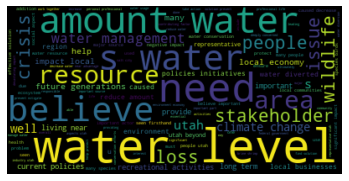

In [39]:

# create a word map from all the words in all the responses 

# remove all non-relevant words
# # words to remove: months, ago, permalink, embed, award, give, report, reply, points, month, embed, save
# # save these words to list of strings
# remove_words = ["months", "ago", "permalink", "embed", "award", "give", "report", "reply", "points", "month", "embed", "save", "load", "comments", "deleted"]
# # split the string into a list of words
# all_content = all_content.split()
# # remove all the words in the remove_words list
# all_content = [word for word in all_content if word not in remove_words]
# # join the list of words back into a string
# all_content = " ".join(all_content)


wordcloud = WordCloud().generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Plotting

In [69]:
# get all the words from the values question of the responses (in the df)
# the values question is a key in the dictionary of the "content" column
values_question = '“What are the most important values that shape your opinions on the Great Salt Lake and its future? Explain why.”'
values_question_2 = '“What are some of the values or principles that shape your opinions on the Great Salt Lake and its future?”'

# use either of the values_question as the question to get the values responses
values_responses = df["content"].apply(lambda x: x.get(values_question, np.nan))

# for all the responses where the value is np.nan, use value_questions_2 from the df to get the responses 
for i, response in enumerate(values_responses):
    if pd.isna(response):
        values_responses[i] = df["content"][i].get(values_question_2, np.nan)

values_responses

0     As a Utah State Legislator, I believe that it ...
1     As a resident of Salt Lake City, I am deeply c...
2     As a representative of the Great Salt Lake Aud...
3     As an outdoor recreation enthusiast in Utah, t...
4     As a representative of the tourism industry in...
5     As a representative of the Great Salt Lake Ins...
6     As a local business owner in Salt Lake City, t...
7     As a representative of the Mineral Extraction ...
8     As a lifelong resident of Utah, I have a deep ...
9     For me, the most important values that shape m...
10    My people have been connected to the Great Sal...
11    As a representative of the Fishing Industry in...
12    As an academic researcher on the Great Salt La...
13    As a representative of the Utah Department of ...
14    As a representative of the Utah Division of Wa...
15    I have a deep appreciation for the Great Salt ...
16    As a representative of the agricultural sector...
17    As a real estate developer in Salt Lake Ci

In [144]:
## STOPWORD REMOVAL & DATA CLEANING - COLUMN CREATION

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

# List of unneeded words
unneeded_words = ["lake", "great", "salt", "important", "also", "part", "values", "must", 
                  "believe", "ensure", "many", "steps", "providing", "way", "recreational", 
                  "including", "resource", "value", "finally", "representative", "legislator"] 

# Function to clean and tokenize each response
def process_text(text):
    # get the values (the responses to the values question) 
    values_question = '“What are the most important values that shape your opinions on the Great Salt Lake and its future? Explain why.”'
    values_question_2 = '“What are some of the values or principles that shape your opinions on the Great Salt Lake and its future?”'
    
    # use either of the values_question as the question to get the values responses
    values_response = text.get(values_question, np.nan)

    # for all the responses where the value is np.nan, use value_questions_2 from the df to get the responses 
    if pd.isna(values_response):
        values_response = text.get(values_question_2, np.nan)
        
    # stringify and lowercase the response
    values_response = str(values_response).lower()
    
    # Tokenize the text
    words = word_tokenize(values_response)
    # Remove stopwords and non-alphabetic tokens
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # Remove the unnecessary words 
    words = [word for word in words if word not in unneeded_words]
    return words

# Apply the function to each response to create the 'values_words' column with the key values-related words 
df['values_words'] = df['content'].apply(process_text)

In [145]:

# Set of stopwords in English
stop_words = set(stopwords.words('english'))

# Concatenate all responses into a single string
values_text = ' '.join(values_responses).lower()

# Tokenize the string into individual words
values_words = word_tokenize(values_text)

# Remove stopwords and non-alphabetic tokens
values_words = [word for word in values_words if word.isalpha() and word not in stop_words]

# remove the unnecessary words 
unneeded_words = ["lake", "great", "salt", "important", "also", "part", "values", "must", 
                  "believe", "ensure", "many", "steps", "providing", "way", "recreational", 
                  "including", "resource", "value", "finally"]
values_words = [word for word in values_words if word not in unneeded_words]
len(values_words)

2007

In [146]:
# Concatenate all 'values_words' into a single string
values_text = ' '.join(word for words_list in df['values_words'] for word in words_list)
len(values_text)

16698

In [165]:
# Group 'values_words' by 'stakeholder_type' and join the words together
df_grouped = df.groupby('stakeholder_type')['values_words'].sum().reset_index()

# Convert the list of words into a single string for each stakeholder type
df_grouped['values_words'] = df_grouped['values_words'].apply(lambda words: ' '.join(words))

# Print the DataFrame to check the result
print(df_grouped)

          stakeholder_type                                       values_words
0                academics  institute shape opinions future preservation s...
1              agriculture  agricultural sector utah shape opinion future ...
2        environmentalists  audubon preservation natural habitats wildlife...
3               government  utah state responsibility protect future utah ...
4                   health  public health official utah prioritize health ...
5                 industry  tourism industry utah shapes opinion future pr...
6                    media  resident city deeply concerned future symbol b...
7   native_american_tribes  people connected thousands years culture life ...
8               recreation  outdoor recreation enthusiast utah shape opini...
9    religious_communities  utah religious communities shape opinions futu...
10               residents  resident city beauty history importance local ...
11                   youth  shape opinion future importance pres

In [148]:
# extract all the responses from the column to a dictionary with 0/1 as values 
all_responses = df["content"].to_dict()
all_responses

{0: {'“How does the Great Salt Lake drying up affect your personal and professional life? Provide specific stories or facts from your life.”': 'The Great Salt Lake drying up has been a major concern for me personally and professionally. As a representative of the Utah State Legislature, I am keenly aware of the impact that this crisis has on the people of my state. \n\nPersonally, I have seen how the receding lake levels have taken a toll on the local wildlife. I grew up in the area, and I remember the Great Salt Lake being a vibrant and thriving ecosystem. Now, I see the lake slowly drying up, and I know that this will have a devastating impact on the birds and other animals that rely on the lake for their habitat. \n\nProfessionally, I understand that this crisis has the potential to have a major economic impact on our state. The Great Salt Lake is an integral part of our tourism industry, and the receding lake levels could have a serious effect on our ability to attract visitors. Ad

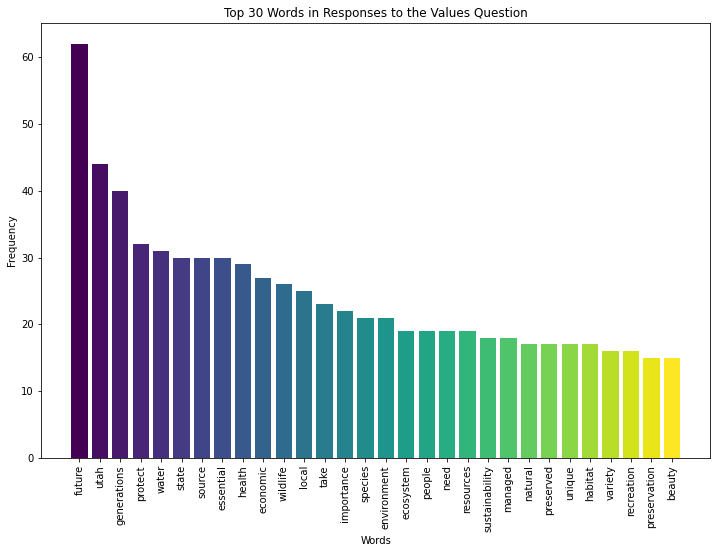

In [149]:
# Convert the list of words into a DataFrame
df_values_words = pd.DataFrame(values_words, columns=['word'])

# Count the frequency of each word
word_counts = df_values_words['word'].value_counts().reset_index()
word_counts.columns = ['word', 'frequency']

# Sort the DataFrame by frequency
word_counts = word_counts.sort_values(by='frequency', ascending=False)

# Take the top 30 words
top_words = word_counts.head(30)

# Generate a list of colors using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, 30))

# Plot a bar chart of the top 30 words
# improve the spacing of the plot and make every bar a different color 
plt.figure(figsize=(12,8))
plt.bar(top_words['word'], top_words['frequency'], color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words in Responses to the Values Question')
plt.xticks(rotation=90)
plt.show()

In [159]:
df_grouped

,stakeholder_type,values_words
0,academics,institute shape opinions future preservation s...
1,agriculture,agricultural sector utah shape opinion future ...
2,environmentalists,audubon preservation natural habitats wildlife...
3,government,utah state responsibility protect future utah ...
4,health,public health official utah prioritize health ...
5,industry,tourism industry utah shapes opinion future pr...
6,media,resident city deeply concerned future symbol b...
7,native_american_tribes,people connected thousands years culture life ...
8,recreation,outdoor recreation enthusiast utah shape opini...
9,religious_communities,utah religious communities shape opinions futu...


In [166]:
import pandas as pd
from collections import Counter
from plotly import graph_objects as go

# Assuming df_grouped is your DataFrame and it has columns 'stakeholder_type' and 'values_words'
df_grouped['values_words'] = df_grouped['values_words'].apply(lambda x: x.split())

# Calculate word frequency for each stakeholder_type
df_grouped['word_freq'] = df_grouped['values_words'].apply(lambda x: dict(Counter(x)))

# Explode the word_freq column into multiple rows
rows = []
_ = df_grouped.apply(lambda row: [rows.append([row['stakeholder_type'], nn, freq]) 
                         for nn, freq in row.word_freq.items()], axis=1)
df_new = pd.DataFrame(rows, columns=['stakeholder_type', 'word', 'freq'])

# Sort by stakeholder_type and frequency
df_new = df_new.sort_values(['stakeholder_type', 'freq'], ascending=[True, False])

# Select the top 3 words by frequency for each stakeholder_type
df_top3_words = df_new.groupby('stakeholder_type').head(3)

# Create the bar chart with Plotly
fig = go.Figure()

# We transpose the bar chart by swapping x and y
for stakeholder_type, df_sub in df_top3_words.groupby('stakeholder_type'):
    fig.add_trace(go.Bar(y=df_sub['word'], x=df_sub['freq'], name=stakeholder_type, orientation='h'))

# Update layout for a more descriptive and well formatted chart
fig.update_layout(
    barmode='stack', 
    title_text='Future comes First: Frequency of Words Used in Describing Values, by Stakeholder Type', # add title
    xaxis_title='Frequency', # x-axis label
    yaxis_title='Words', # y-axis label
    height=600, 
    width=900
)

fig.show()

In [161]:

# Assuming df_grouped is your DataFrame and it has columns 'stakeholder_type' and 'values_words'
df_grouped['values_words'] = df_grouped['values_words'].apply(lambda x: x.split())

# Calculate word frequency for each stakeholder_type
df_grouped['word_freq'] = df_grouped['values_words'].apply(lambda x: dict(Counter(x)))

# Explode the word_freq column into multiple rows
rows = []
_ = df_grouped.apply(lambda row: [rows.append([row['stakeholder_type'], nn, freq]) 
                         for nn, freq in row.word_freq.items()], axis=1)
df_new = pd.DataFrame(rows, columns=['stakeholder_type', 'word', 'freq'])

# Sort by stakeholder_type and frequency
df_new = df_new.sort_values(['stakeholder_type', 'freq'], ascending=[True, False])

# Select the top 3 words by frequency for each stakeholder_type
df_top3_words = df_new.groupby('stakeholder_type').head(3)

# Create the bar chart with Plotly
fig = go.Figure()

for stakeholder_type, df_sub in df_top3_words.groupby('stakeholder_type'):
    fig.add_trace(go.Bar(x=df_sub['word'], y=df_sub['freq'], name=stakeholder_type))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}, height=600, width=900)
fig.show()


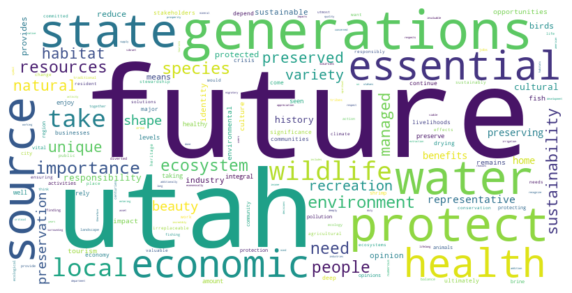

In [96]:
from wordcloud import WordCloud

# Convert the DataFrame to a dictionary to generate the word cloud
word_dict = dict(zip(word_counts['word'], word_counts['frequency']))

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, colormap='viridis', background_color='white').generate_from_frequencies(word_dict)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Sentiment Analysis

In [167]:
from textblob import TextBlob

# Combine all responses into a single text
df['combined_responses'] = df['content'].apply(lambda x: ' '.join(list(x.values())))

# Compute sentiment scores
df['sentiment'] = df['combined_responses'].apply(lambda x: TextBlob(x).sentiment.polarity)

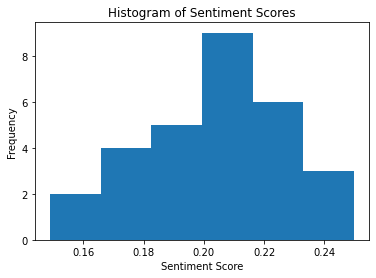

In [168]:
import matplotlib.pyplot as plt

plt.hist(df['sentiment'], bins='auto')
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

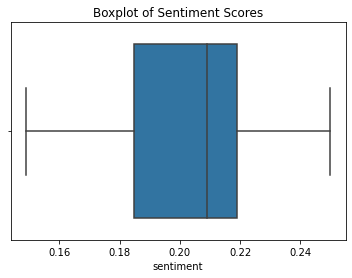

In [169]:
import seaborn as sns

sns.boxplot(x=df['sentiment'])
plt.title('Boxplot of Sentiment Scores')
plt.show()

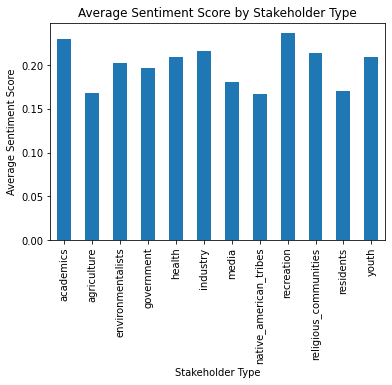

In [170]:
average_sentiment = df.groupby('stakeholder_type')['sentiment'].mean()
average_sentiment.plot(kind='bar')
plt.title('Average Sentiment Score by Stakeholder Type')
plt.xlabel('Stakeholder Type')
plt.ylabel('Average Sentiment Score')
plt.show()

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def calculate_sentiment(text: str) -> float:
    return sia.polarity_scores(text)

# Join the words back together
df_grouped['values_sentences'] = df_grouped['values_words'].apply(lambda x: ' '.join(x))

# Calculate sentiment for each stakeholder_type
df_grouped['sentiment'] = df_grouped['values_sentences'].apply(calculate_sentiment)

df_grouped[['stakeholder_type', 'sentiment']]

In [174]:
# create a graph of sentiment by stakeholder type, this time coloring each bar chart by its sentiment, and sorting by sentiment 
# also use plotly for this chart if possible 
df_grouped = df.groupby('stakeholder_type')['sentiment'].mean().reset_index()
df_grouped = df_grouped.sort_values(by='sentiment', ascending=False)
df_grouped

,stakeholder_type,sentiment
8,recreation,0.236609
0,academics,0.230063
5,industry,0.216130
9,religious_communities,0.213859
4,health,0.209821
11,youth,0.209112
2,environmentalists,0.202054
3,government,0.196262
6,media,0.180550
10,residents,0.170461


In [ ]:

fig = px.bar(df_grouped, x='stakeholder_type', y='sentiment', color='sentiment', 
             color_continuous_scale='viridis', title='Average Sentiment Score by Stakeholder Type')
fig.show()